In [1]:
# Try 

In [37]:
import numpy as np
%matplotlib inline
import matplotlib.pylab as plt
from lsst.daf.persistence import Butler
from lsst.afw.image import abMagFromFlux, fluxFromABMag
from lsst.afw.table import MultiMatch
from lsst.meas.astrom import DirectMatchTask
import lsst.daf.persistence as daf_persistence
import pandas
import os

from astropy.coordinates import SkyCoord
from astropy import units as u


In [2]:
# Stealing tbe butler code from HCS_colorcolor.ipynb
depth = 'DEEP' #use the DEEP catalog, got this file path from another notebook
butler = daf_persistence.Butler('/datasets/hsc/repo/rerun/DM-13666/%s/'%(depth))

In [3]:
tract = 10054
band = 'HSC-R'

In [5]:
patch = '0,0'
sources = butler.get('deepCoadd_meas', tract=tract, patch=patch, filter=band)
subset = butler.subset('deepCoadd_meas', filter=band, tract=tract, patch=patch)

DataId(initialdata={'filter': 'HSC-R', 'tract': 10054, 'patch': '0,0'}, tag=set())

In [21]:
sources['coord_ra'], sources['coord_dec']

(array([2.61099674, 2.61092744, 2.61079699, ..., 2.61017199, 2.60958772,
        2.60959261]),
 array([0.05025443, 0.05025856, 0.05024888, ..., 0.05240874, 0.05283503,
        0.05283339]))

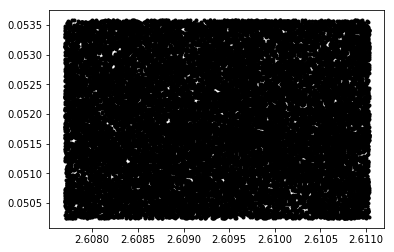

In [22]:
plt.plot(sources['coord_ra'], sources['coord_dec'], 'k.')

In [27]:
# Set up a catalog
matched_cat = MultiMatch(sources.schema, {"tract": np.int64})
# Try to add the sources to it
matched_cat.add(sources,{"tract": 10054})

In [30]:
np.degrees(0.052), np.degrees(2.6095)

(2.979380534680281, 149.51333663938834)

In [ ]:
# XXX--upon further research, MultiMatch is not really the right tool for this job. JIRA says 
# it is only a quick-and-dirty type of code and we should really just use astropy for simple
# catalog matching.

In [34]:
# GAIA stuff in /project/shared/data/gaia_dr2
path = '/project/shared/data/gaia_dr2'
file_guess = 'GaiaSource_3848200193665853184_3848584747857767040.csv.gz'
filepath = os.path.join(path, file_guess)

In [35]:
gaia_data = pandas.read_csv(filepath, compression='gzip')

In [40]:
gaia_cat = SkyCoord(gaia_data['ra']*u.deg, gaia_data['dec']*u.deg)

In [42]:
hsc_cat = SkyCoord(sources['coord_ra']*u.rad, sources['coord_dec']*u.rad)

In [44]:
idx, d2d, d3d = gaia_cat.match_to_catalog_sky(hsc_cat)

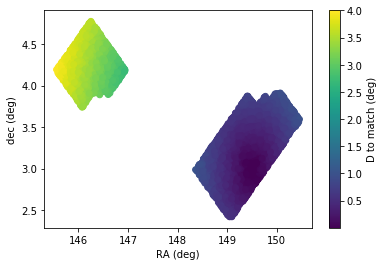

In [54]:
plt.scatter(gaia_data['ra']*u.deg, gaia_data['dec']*u.deg, c=d2d)
cb = plt.colorbar()
plt.xlabel('RA (deg)')
plt.ylabel('dec (deg)')
cb.set_label('D to match (deg)')